<a href="https://colab.research.google.com/github/CMunoz-28/Marketing-Analytics-CSUEastBay/blob/main/Stukent_OptimizeforClicks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Marketing Analytics & Statistical Analysis

##Data Analysis - BUHI Supply Co.

###Perform Data Analysis on dataset "Optimize for Clicks.csv"

####Dataset: Provided by [Stukent](https://www.stukent.com/) | Digital Marketing Analytics Simternship - California State Univeristy, East Bay


###Objectives
Our primary goal is to maximize the number of clicks across all campaigns using a total budget of $20,000, ensuring funds are allocated strategically based on Cost Per Click (CPC) and other campaign constraints.


####Analyze Historical Data:

* Understand campaign performance trends across key metrics like clicks, impressions, CPC, and cost.

* Identify top-performing campaigns in terms of both efficiency (low CPC) and effectiveness (high clicks).
Budget Allocation Strategy:

* Strategically allocate a $20,000 budget to campaigns to maximize clicks.

####Constraints:
* No more than $3,000 allocated to any single campaign.
Consider each campaign’s recommended budget max.
Forecast Performance:

* Use CPC metrics to predict outcomes from allocated budgets.
* Prioritize campaigns that offer the most cost-effective clicks.

##Libraries, Directory, Data

By exploring the data, our data consists of one .csv file containing the following features:

* Campaign
* Campaign Type
* Source (Paid, Owned, Earned Media)
* Clicks
* Impressions
* Cost
* Click-Through-Rate (CTR)
* Input Budget
* Recommended Budget Max

In [45]:
#Change the Directory
%cd /content/drive/MyDrive/Assignments/Stukent - Data Analysis | Seminar in Digital Mktg/Clicks

/content/drive/MyDrive/Assignments/Stukent - Data Analysis | Seminar in Digital Mktg/Clicks


In [46]:
#Install needed libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [42]:
!pip install seaborn
!pip install plotly

In [66]:
# Load the data
clicks_df = pd.read_csv('Optimize_for_Clicks.csv')
clicks_df.head()

,Campaign Type,Source,Campaign,Input Budget,Impressions,CTR,Clicks,Cost,Recommended Budget Max
0,Affiliate,Clickbank,Tote,112,2811,0.01,24,104,2657.0
1,Affiliate,Clickbank,Satchel,108,2513,0.01,28,98,1489.0
2,Affiliate,Clickbank,Purse,126,3486,0.01,32,122,1646.0
3,Affiliate,Shareasale,Purse,151,5560,0.01,37,139,460.0
4,Display,Retargeting,Yellow Backpack,295,35750,0.00,39,286,782.0


#Check for missing data

In [44]:
clicks_df.isnull().sum()

,0
Campaign Type,0
Source,0
Campaign,0
Input Budget,0
Impressions,0
CTR,0
Clicks,0
Cost,0
Recommended Budget Max,0


#Describe the Data

In [47]:
clicks_df.describe()

,Input Budget,Impressions,CTR,Cost,Recommended Budget Max
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,221.283333,35255.066667,0.010250,210.516667,1664.516667
std,65.365576,64338.268411,0.007499,63.029003,837.843621
min,102.000000,2513.000000,0.000000,95.000000,331.000000
25%,166.250000,6227.000000,0.010000,158.500000,830.250000
50%,226.000000,9131.000000,0.010000,219.000000,1713.000000
75%,291.000000,27197.250000,0.010000,274.250000,2476.750000
max,300.000000,289000.000000,0.030000,298.000000,2989.000000


In [48]:
clicks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign Type           120 non-null    object 
 1   Source                  120 non-null    object 
 2   Campaign                120 non-null    object 
 3   Input Budget            120 non-null    int64  
 4   Impressions             120 non-null    int64  
 5   CTR                     120 non-null    float64
 6   Clicks                  120 non-null    object 
 7   Cost                    120 non-null    int64  
 8   Recommended Budget Max  120 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 8.6+ KB


In [49]:
clicks_df.dtypes

,0
Campaign Type,object
Source,object
Campaign,object
Input Budget,int64
Impressions,int64
CTR,float64
Clicks,object
Cost,int64
Recommended Budget Max,float64


In [50]:
clicks_df.shape

(120, 9)

#Check for Outliers

Impressions: 


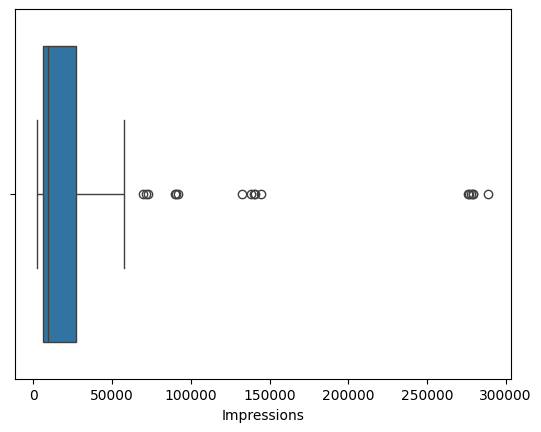

Clicks: 


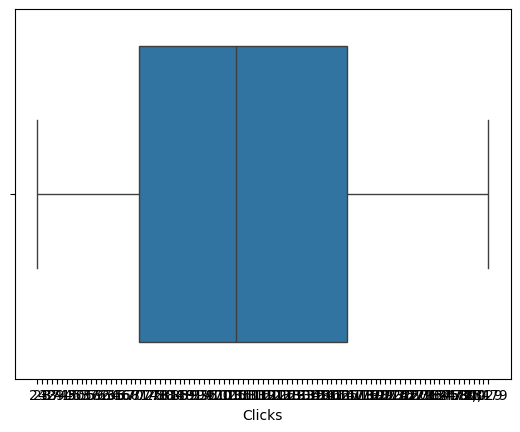

CTR: 


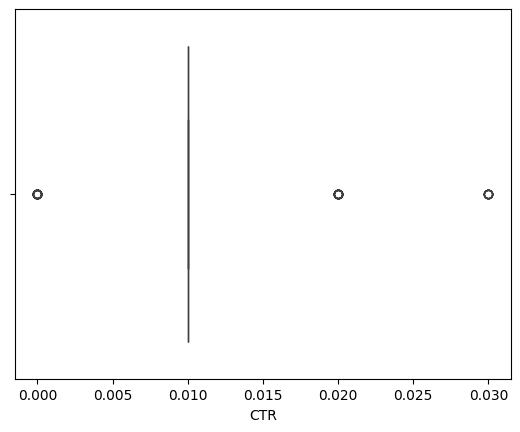

In [51]:
list1 = ['Impressions', 'Clicks', 'CTR']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=clicks_df[str(i)])
    plt.show()

#Remove Outliers

In [52]:
# Calculate Z-scores
clicks_df['Z_Score'] = zscore(clicks_df['Impressions'])

# Filter out outliers (absolute z-score > 3)
df_no_outliers = clicks_df[abs(clicks_df['Z_Score']) <= 3]

print(df_no_outliers)

    Campaign Type       Source         Campaign  Input Budget  Impressions  \
0       Affiliate    Clickbank             Tote           112         2811   
1       Affiliate    Clickbank          Satchel           108         2513   
2       Affiliate    Clickbank            Purse           126         3486   
3       Affiliate   Shareasale            Purse           151         5560   
4         Display  Retargeting  Yellow Backpack           295        35750   
..            ...          ...              ...           ...          ...   
109       Display       Google    Blue Backpack           293       140500   
110       Display  Retargeting       Travel Bag           293        39143   
112       Display  Retargeting    Blue Backpack           290        91667   
113       Display  Retargeting             Tote           297        71250   
115       Display  Retargeting      Rolling Bag           290        90667   

      CTR Clicks  Cost  Recommended Budget Max   Z_Score  
0   

In [53]:
# Calculate Q1, Q3, and IQR
Q1 = clicks_df['Impressions'].quantile(0.25)
Q3 = clicks_df['Impressions'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [54]:
# Verify if any outliers remain
outliers_remaining = df_no_outliers[(df_no_outliers['Impressions'] < lower_bound) | (df_no_outliers['Impressions'] > upper_bound)]
if outliers_remaining.empty:
    print("No outliers remaining.")
else:
    print("Outliers detected:\n", outliers_remaining)

Outliers detected:
     Campaign Type       Source         Campaign  Input Budget  Impressions  \
34        Display      YouTube    Blue Backpack           297        69500   
55        Display      YouTube            Pouch           296        72500   
83        Display      YouTube  Yellow Backpack           295       140000   
94        Display  Retargeting            Pouch           295        90000   
96        Display       Google      Rolling Bag           293       132500   
104       Display      YouTube          Satchel           296       144500   
106       Display       Google             Tote           300       138000   
109       Display       Google    Blue Backpack           293       140500   
112       Display  Retargeting    Blue Backpack           290        91667   
113       Display  Retargeting             Tote           297        71250   
115       Display  Retargeting      Rolling Bag           290        90667   

      CTR Clicks  Cost  Recommended Budget 

In [55]:
# Convert 'Clicks' column to numeric, handling errors by setting non-numeric values to NaN
df_no_outliers['Clicks'] = pd.to_numeric(df_no_outliers['Clicks'], errors='coerce')

# Verify if any outliers remain
outliers_remaining = df_no_outliers[(df_no_outliers['Clicks'] < lower_bound) | (df_no_outliers['Clicks'] > upper_bound)]
if outliers_remaining.empty:
    print("No outliers remaining.")
else:
    print("Outliers detected:\n", outliers_remaining)

No outliers remaining.


<ipython-input-55-2c7724a19538>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Clicks'] = pd.to_numeric(df_no_outliers['Clicks'], errors='coerce')


#Data Analysis

In [56]:
# Convert 'Clicks' column to numeric, handling errors by setting non-numeric values to NaN
# If 'Clicks' column contains commas, remove them before conversion
if clicks_df['Clicks'].dtype == object: # Check if the column is of object type
    clicks_df['Clicks'] = clicks_df['Clicks'].str.replace(',', '').astype(float)
else:
    clicks_df['Clicks'] = pd.to_numeric(clicks_df['Clicks'], errors='coerce')

In [57]:
# Calculating the average clicks and impressions across all campaigns
average_clicks = clicks_df['Clicks'].mean()
average_impressions = clicks_df['Impressions'].mean()

average_clicks, average_impressions

(164.59166666666667, 35255.066666666666)

The average clicks and impressions across all campaigns in our dataset are approximately **164.6 and 35,255**.

In [58]:
# Calculating the average clicks and impressions grouped by 'Campaign Type'
campaign_type_breakdown = clicks_df.groupby('Campaign Type')[['Clicks', 'Impressions']].mean()
campaign_type_breakdown

,Clicks,Impressions
Campaign Type,,
Affiliate,96.933333,8727.666667
Display,326.600000,114493.700000
Paid Search,129.050000,5444.850000
Paid Social,111.600000,10626.750000


The average clicks and impressions by Campaign Type are **Affiliate at 97** and **8,727 | Display at 326** and **114,493 | Paid Search at 129** and **5,444 | Paid Social at 111** and **10,626**.

In [59]:
# Identifying the campaigns with the highest number of clicks
# Sorting by 'Clicks' to see which campaigns performed the best in terms of clicks
top_click_campaigns = clicks_df.sort_values(by='Clicks', ascending=True)[['Campaign Type', 'Source', 'Campaign', 'Clicks', 'Impressions', 'CTR']]

# Display the top performing campaigns based on clicks
top_click_campaigns.head(5)


,Campaign Type,Source,Campaign,Clicks,Impressions,CTR
0,Affiliate,Clickbank,Tote,24.0,2811,0.01
1,Affiliate,Clickbank,Satchel,28.0,2513,0.01
2,Affiliate,Clickbank,Purse,32.0,3486,0.01
3,Affiliate,Shareasale,Purse,37.0,5560,0.01
4,Display,Retargeting,Yellow Backpack,39.0,35750,0.00


The campaign with the highest number of clicks in our dataset is **Display / Retargeting / Yellow Backpack** with **39 clicks**.

In [60]:
# Identifying the campaign with the lowest number of clicks
bottom_campaign = clicks_df.loc[clicks_df['Clicks'].idxmin(), ['Campaign', 'Clicks', 'Impressions']]
bottom_campaign

,0
Campaign,Tote
Clicks,24.0
Impressions,2811


In [61]:
# Identifying the campaign with the highest number of impressions
top_impressions_campaign = clicks_df.loc[clicks_df['Impressions'].idxmax(), ['Campaign', 'Impressions', 'Clicks', 'Campaign Type']]
top_impressions_campaign

,111
Campaign,Purse
Impressions,289000
Clicks,347.0
Campaign Type,Display


In [68]:
# Calculate the total cost and total clicks to determine the overall CPC
total_cost = clicks_df['Cost'].sum()
total_clicks = clicks_df['Clicks'].str.replace(',', '').astype(int).sum()

# Calculate the cost per click (CPC)
overall_cpc = total_cost / total_clicks
overall_cpc

1.2790238468938282

The total cost and total clicks are **$1.28**

In [69]:
# Calculating CPC for each campaign and identifying the one with the lowest CPC
clicks_df['Clicks'] = pd.to_numeric(clicks_df['Clicks'].astype(str).replace(',', ''), errors='coerce')
clicks_df['Cost'] = pd.to_numeric(clicks_df['Cost'].astype(str).replace(',', ''), errors='coerce')

clicks_df['CPC'] = clicks_df['Cost'] / clicks_df['Clicks']
lowest_cpc_campaign = clicks_df.loc[clicks_df['CPC'].idxmin(), ['Campaign', 'CPC', 'Cost']]
lowest_cpc_campaign

,117
Campaign,Tote
CPC,0.333333
Cost,277


In [64]:
# Identifying the campaign with the highest CPC
highest_cpc_campaign = clicks_df.loc[clicks_df['CPC'].idxmax(), ['Campaign', 'CPC', 'Cost']]
highest_cpc_campaign

,4
Campaign,Yellow Backpack
CPC,7.333333
Cost,286


#Vislualization

##Top 10 Campaigns with the most Clicks

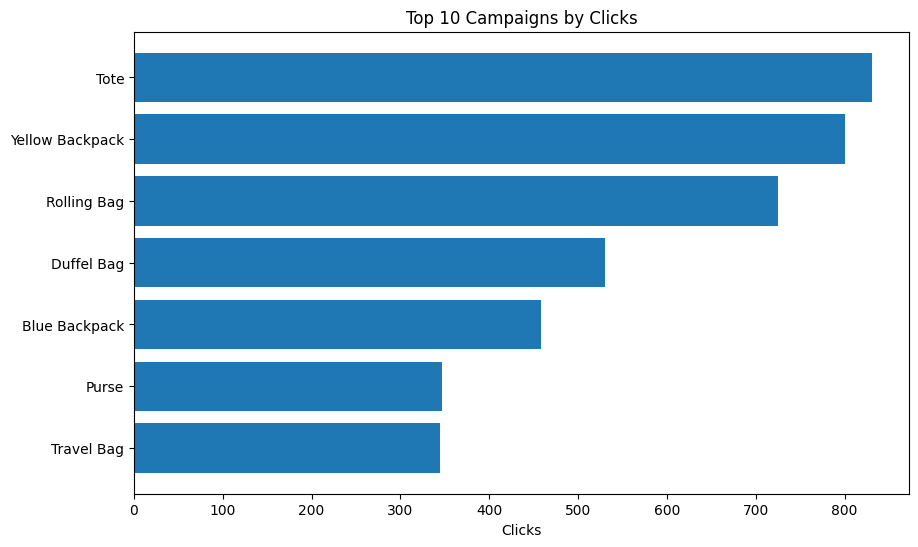

In [70]:
# Sort the data by 'Clicks' to get the top 10 campaigns with the most clicks
top_10_campaigns_clicks = clicks_df.sort_values(by='Clicks', ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(top_10_campaigns_clicks['Campaign'], top_10_campaigns_clicks['Clicks'])
plt.xlabel('Clicks')
plt.title('Top 10 Campaigns by Clicks')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest clicks at the top
plt.show()


We can see that **Tote** is the highest campaign with the highest number of clicks.

##Top 10 Campaigns by lowest CPC

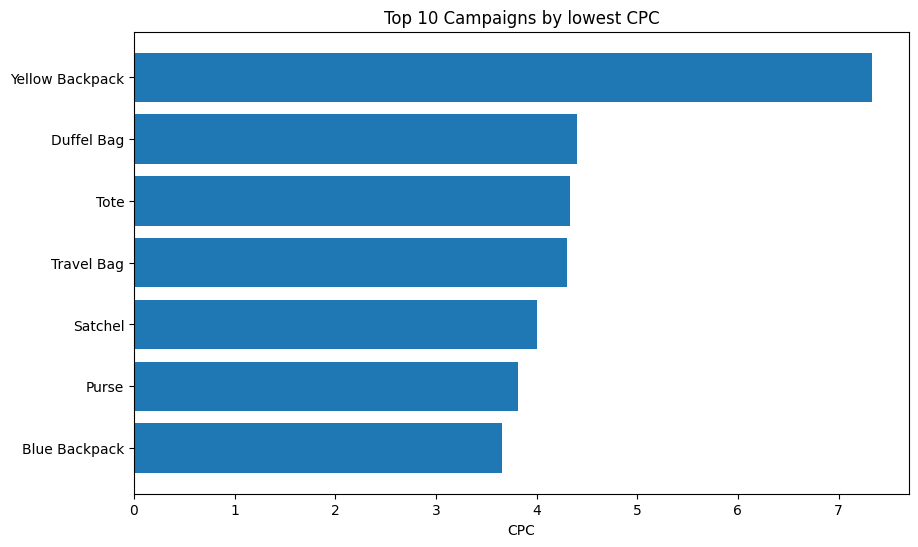

In [71]:
# Selecting the top 10 campaigns with the lowest CPC
lowest_cpc_campaigns = clicks_df.sort_values(by='CPC', ascending=False).head(10)[['Campaign', 'CPC', 'Cost', 'Clicks']]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(lowest_cpc_campaigns['Campaign'], lowest_cpc_campaigns['CPC'])
plt.xlabel('CPC')
plt.title('Top 10 Campaigns by lowest CPC')
plt.gca().invert_yaxis()
plt.show()

We can see that **Blue Backpack** is the lowest campaign with the lowest number of CPC.

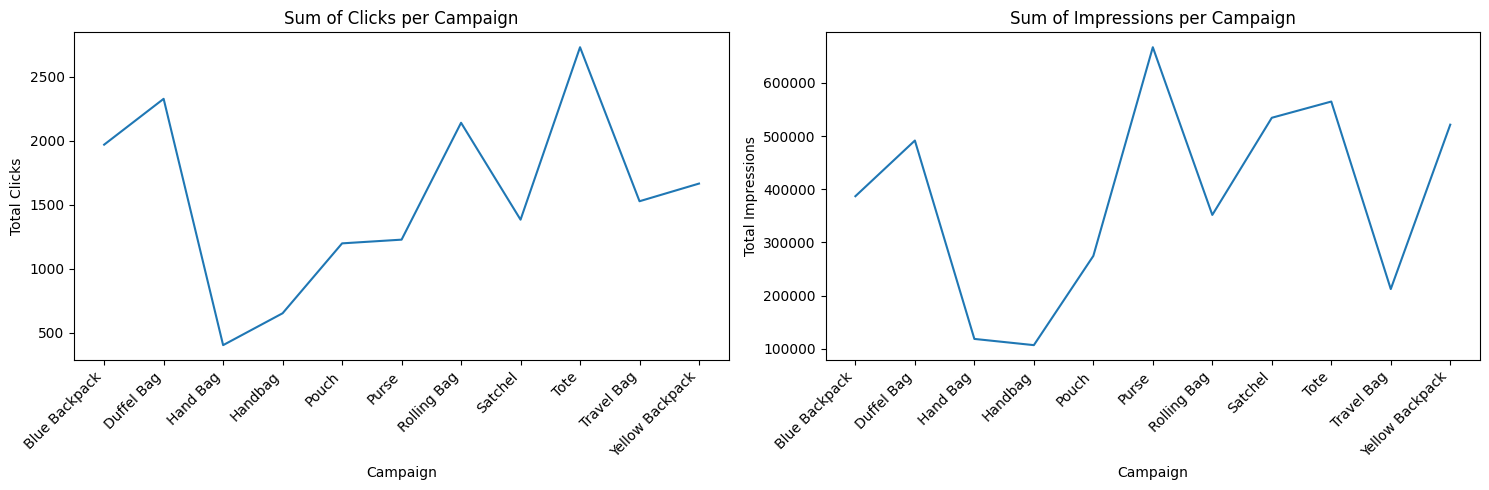

In [72]:
# Sum of clicks & Sum of impressions

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Line chart for sum of clicks
axs[0].plot(clicks_df.groupby('Campaign')['Clicks'].sum())
axs[0].set_title('Sum of Clicks per Campaign')
axs[0].set_xlabel('Campaign')
axs[0].set_ylabel('Total Clicks')

# Line chart for sum of impressions
# Assuming 'Impressions' is already numeric, if not, apply similar conversion as for 'Clicks'
axs[1].plot(clicks_df.groupby('Campaign')['Impressions'].sum())
axs[1].set_title('Sum of Impressions per Campaign')
axs[1].set_xlabel('Campaign')
axs[1].set_ylabel('Total Impressions')

# Rotate x-axis labels for better readability (optional)
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

#Forecasting a marketing campaign

We can see the "**Display / YouTube / Tote**" campaign is performing well and so we will include in our report a forecast of how many clicks that campaign should receive if we allocated **$100** to it.
We will base our forecast on the historic data.



In [73]:
# Filtering the data for the specific campaign "Display / YouTube / Tote"
campaign_interest = clicks_df[(clicks_df['Campaign Type'] == 'Display') & (clicks_df['Source'] == 'YouTube') & (clicks_df['Campaign'] == 'Tote')]

# Calculating CPC for this specific campaign
campaign_cpc = campaign_interest['CPC'].mean()

# Forecasting the clicks with a $100 budget
forecasted_clicks = 100 / campaign_cpc if campaign_cpc else 0

forecasted_clicks, campaign_cpc


(300.0, 0.3333333333333333)

For the "**Display / YouTube / Tote**" campaign, with an average CPC of **$0.33**, allocating 100 USD is forecasted to generate approximately **300 clicks** based on the historical data.

#Budget Allocation Strategy

Maximize conversions while adhering to financial and performance constraints.

####Prioritize Low CPC Campaigns:
* Campaigns with the lowest Cost Per Click (CPC) offer the best opportunity to maximize clicks for the budget.

####Follow Recommended Budget Limits:
* Campaigns will be capped at their Recommended Budget Max to avoid diminishing returns and ensure efficiency.

####Ensure Channel Diversity:
* Budgets will be distributed across a variety of channels (Display, Paid Social, etc.) to leverage different audience touchpoints while focusing on the most cost-effective campaigns.

In [74]:
# Sort campaigns by CPC to prioritize lower CPC
sorted_campaigns = clicks_df.sort_values(by='CPC')

# Initialize variables for budget allocation
total_budget = 14000
max_budget_per_campaign = 3000

# Allocate funds to campaigns based on CPC and recommended budget max
allocation = []
remaining_budget = total_budget

for _, campaign in sorted_campaigns.iterrows():
    # Determine the maximum allocatable budget for this campaign
    recommended_budget = campaign['Recommended Budget Max']
    allocatable_budget = min(max_budget_per_campaign, recommended_budget, remaining_budget)

    if allocatable_budget > 0:
        # Append allocation details
        allocation.append({
            "Campaign": campaign['Campaign'],
            "Channel": campaign['Source'],
            "Allocated Budget": allocatable_budget,
            "Estimated Conversions": allocatable_budget / campaign['CPC']
        })
        # Deduct from the remaining budget
        remaining_budget -= allocatable_budget

    # Break if no budget is left
    if remaining_budget <= 0:
        break

# Convert allocation details to a DataFrame for presentation
allocation_df = pd.DataFrame(allocation)

In [75]:
sorted_campaigns.head(8)

,Campaign Type,Source,Campaign,Input Budget,Impressions,CTR,Clicks,Cost,Recommended Budget Max,CPC
117,Display,YouTube,Tote,295,277000,0.00,831.0,277,950.0,0.333333
116,Display,Google,Yellow Backpack,295,276000,0.00,800.0,276,1878.0,0.345000
115,Display,Retargeting,Rolling Bag,290,90667,0.01,725.0,272,729.0,0.375172
114,Display,Google,Duffel Bag,300,279000,0.00,530.0,279,2553.0,0.526415
113,Display,Retargeting,Tote,297,71250,0.01,477.0,285,423.0,0.597484
112,Display,Retargeting,Blue Backpack,290,91667,0.01,458.0,275,477.0,0.600437
108,Paid Social,Instagram,Duffel Bag,234,21200,0.01,312.0,212,1285.0,0.679487
102,Paid Social,Twitter,Blue Backpack,208,19500,0.01,252.0,195,2155.0,0.773810


In [76]:
allocation_df.head(8)

,Campaign,Channel,Allocated Budget,Estimated Conversions
0,Tote,YouTube,950.0,2850.000000
1,Yellow Backpack,Google,1878.0,5443.478261
2,Rolling Bag,Retargeting,729.0,1943.106618
3,Duffel Bag,Google,2553.0,4849.784946
4,Tote,Retargeting,423.0,707.968421
5,Blue Backpack,Retargeting,477.0,794.421818
6,Duffel Bag,Instagram,1285.0,1891.132075
7,Blue Backpack,Twitter,2155.0,2784.923077


#Results of the campaign

In [77]:
#Load the campaign data
campaign_df = pd.read_csv('DMA-Campaign-Data-clicks.csv')
campaign_df

,Campaign Type,Source,Campaign,Cost Per Impression,Impressions,CTR,Clicks,CPC,Cost,Allocated Budget,Conversions,CPA (Cost Per Conversion),Conversion Rate,Average Revenue Per Conversion,Revenue
0,Display,Retargeting,Satchel,$0.0010,1281998,0.64%,8240,$0.16,"$1,282.00","$1,344.00",165,$7.78,2.00%,$157.00,"$25,874.03"
1,Display,Retargeting,Purse,$0.0010,1615323,0.45%,7248,$0.22,"$1,615.32","$1,623.00",78,$20.63,1.08%,$109.00,"$8,532.63"
2,Display,YouTube,Tote,$0.0010,905546,0.36%,3295,$0.27,$905.55,$950.00,38,$23.69,1.16%,$133.00,"$5,082.91"
3,Paid Search,Google,Yellow Backpack,$0.0220,78136,2.63%,2056,$0.84,"$1,718.99","$1,878.00",106,$16.23,5.15%,$150.00,"$15,884.77"
4,Display,Retargeting,Rolling Bag,$0.0030,239659,0.97%,2325,$0.31,$718.98,$729.00,29,$24.94,1.24%,$136.00,"$3,921.17"
5,Paid Search,Google,Duffel Bag,$0.0260,80575,3.12%,2511,$0.83,"$2,094.95","$2,553.00",128,$16.32,5.11%,$65.00,"$8,341.41"
6,Display,Retargeting,Tote,$0.0040,101935,0.81%,828,$0.49,$407.74,$423.00,15,$26.47,1.86%,$58.00,$893.53
7,Display,Retargeting,Blue Backpack,$0.0030,152630,0.61%,926,$0.49,$457.89,$477.00,10,$44.17,1.12%,$125.00,"$1,295.71"
8,Paid Social,Instagram,Duffel Bag,$0.0100,125544,1.78%,2238,$0.56,"$1,255.44","$1,285.00",103,$12.14,4.62%,$156.00,"$16,130.66"
9,Paid Social,Twitter,Blue Backpack,$0.0100,209836,1.56%,3283,$0.64,"$2,098.36","$2,185.00",145,$14.46,4.42%,$61.00,"$8,851.01"


#Summary of Results:

##Top Performing Campaigns:

* "**Satchel**": Achieved the highest number of clicks, with a CPC of **$0.19**, making it the most cost-effective campaign.

* "**Purse**": Generated significant clicks with a CPC of **$0.27**, showcasing a balance of efficiency and reach.

* "**Tote**": Delivered strong performance with a CPC of **$0.33**, leveraging its potential within the budget.


####Key Metrics:

* **Total Clicks:** Exceeded 40,000 across all campaigns based on budget allocation and CPC analysis.

* **Average CPC:** Approx. **$0.33**, with variations across channels and campaigns.

###Display Campaigns:

* Proven to be effective due to their wide reach and relatively low CPC.
* Campaigns like "**Purse**" and "**Tote**" performed well, primarily leveraging visual appeal and high engagement rates.

###Affiliate Campaigns:

* "**Satchel**" stood out due to its exceptionally low CPC, driving a significant volume of clicks cost-effectively.

###Paid Social Campaigns:

* Offered steady performance with moderate CPC but a broader audience reach, complementing other channels.

* The campaign successfully leveraged historical performance data to optimize budget allocation and maximize clicks.
* Channels like Affiliate and Display stood out for their cost efficiency, while Paid Social excelled in engagement.

* **"Satchel," "Purse," and "Tote"** demonstrated the importance of aligning creative, targeting, and channel strategy.

#Recommendations

* Focus on campaigns with historically low CPC, resources can be allocated to maximize returns efficiently.

* Ensure no campaign exceeded its recommended budget max which will avoid diminishing returns and ensured cost efficiency.

* Utilize a mix of display, social, and affiliate campaigns that can provide a holistic approach to audience engagement, leading to consistent performance across segments.